# Laboratorio 1 - Inteligencia Artificial

##### José Pablo Orellana        - 21970
##### Diego Alberto Leiva        - 21752
##### Gabriel Estuardo García - 21352

# Task 1 - Regresión Lineal

#### Considera un modelo de regresión lineal con dos características, X₁ y X₂, y sus pesos correspondientes w₁ y w₂. Si el modelo predice una salida y mediante la ecuación y = 2w₁X₁ + 3w₂X₂ + 1, ¿cuál es la interpretación del coeficiente 3w₂ en el contexto del modelo?

El coeficiente 3w₂ representa la contribución promedio al cambio de la variable de salida "y" debido a un cambio unitario en la variable independiente X₂, manteniendo contante el valor de X₁ u todas las demás variables.Cada unidad de cambio en X₂ esta relacionado con un cambio promedio de 3w₂ unidades en la variable de salida y.el coeficiente 3w₂ es positivo, por lo que este indica que es un aumento en X₂ el cual esta relacionado con el cambio de la variable de salida "y"(Spiceworks, 2023).

Referencia: What is linear regression?- Spiceworks - Spiceworks. (2023, 3 abril). Spiceworks. https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-linear-regression/ 

#### Explica el concepto de multicolinealidad en el contexto de la regresión lineal. ¿Cómo afecta la multicolinealidad a la interpretación de los coeficientes de regresión individuales?

Respuesta 2

## Task 2 - Clasificación de Sitios de Phishing Regresión Logística y KNN

**Importar Librerias para realizar el EDA del dataset**

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Carga de los datos**

In [7]:
data = pd.read_csv('dataset_phishing.csv', sep=',')

### Exploracion del Dataset

**Estructura general**

In [8]:
data.head(10)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,1,1,1,0,-1,0,0,1,0,phishing
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,...,0,1,0,170,7529,0,0,0,1,legitimate
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,...,1,0,0,76,5767,0,0,1,2,phishing
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,...,1,1,0,371,7298,0,0,0,5,legitimate
9,https://parade.com/425836/joshwigler/the-amazi...,104,10,0,1,10,0,0,0,0,...,1,0,0,128,9368,6774,0,0,5,legitimate


In [9]:
data.tail(10)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
11420,https://adnanboz.wordpress.com/2012/01/06/how-...,116,22,0,2,12,0,0,0,0,...,1,0,0,585,7449,0,0,0,8,legitimate
11421,http://www.peoplemakingplaces.com/includes/Sup...,117,26,0,2,1,0,0,0,0,...,1,0,0,134,2058,0,0,1,2,phishing
11422,http://sheetdownload.com/,25,17,0,1,0,0,0,0,0,...,0,0,0,144,2778,788648,0,0,2,legitimate
11423,http://www.dmega.co.kr/dmega/data/qna/sec/page...,85,15,0,4,0,0,1,0,0,...,0,1,0,293,5186,10408014,0,1,1,phishing
11424,http://www.answers.com/Q/What_are_the_sizes_of...,62,15,0,2,0,0,0,0,0,...,0,1,0,506,8829,2635,0,1,6,legitimate
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate
11429,http://174.139.46.123/ap/signin?openid.pape.ma...,477,14,1,24,0,1,1,9,0,...,1,1,1,0,-1,0,1,1,0,phishing


In [10]:
# Dimensiones del dataset
data.shape

(11430, 89)

**Estadistica descriptiva**

In [11]:
# Resumen del dataset
data.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [12]:
# Informacion general de la data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [13]:
# Presencia de valores nulos
data.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

**Balanceo del Dataset**

status
legitimate    50.0
phishing      50.0
Name: proportion, dtype: float64

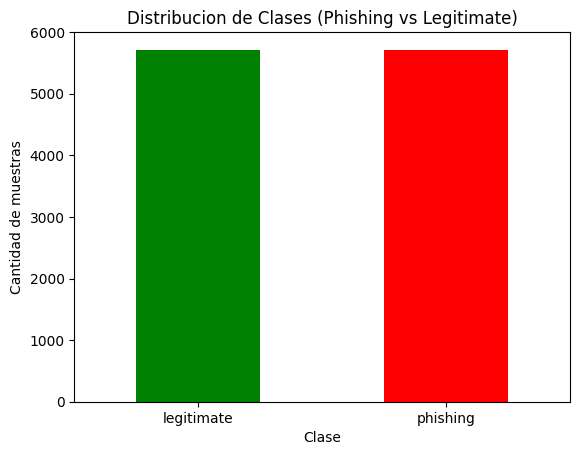

In [14]:
# Visualizacion de la distribucion de clases
data.status.value_counts().plot(kind = "bar", color=['green','red'])
plt.title("Distribucion de Clases (Phishing vs Legitimate)")
plt.xlabel("Clase")
plt.ylabel("Cantidad de muestras")
plt.xticks(rotation=0)

# Porcentaje de la distribucion de clases
data['status'].value_counts(normalize=True) * 100

No es necesario realizar un balanceo, pues el dataset ya se encuentra balanceado

**Datos atipicos**

Text(0.5, 1.0, 'Boxplot Status vs Page Rank')

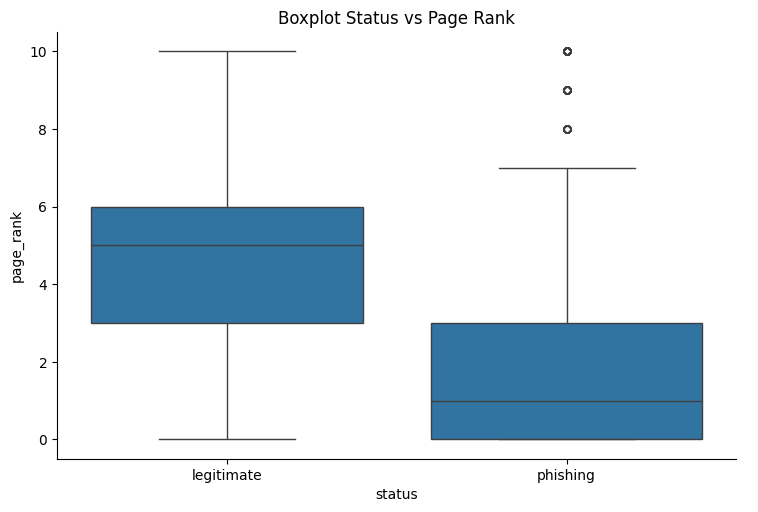

In [15]:
sns.catplot(x="status", y="page_rank", data=data, kind="box", aspect = 1.5)
plt.title("Boxplot Status vs Page Rank")

### Preprocesamiento de la data

**Encoding del dataset**

In [16]:
data['status'] = data['status'].map({'legitimate': 0, 'phishing': 1})
data.head(10)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,1,1,1,0,-1,0,0,1,0,1
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,...,0,1,0,170,7529,0,0,0,1,0
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,...,1,0,0,76,5767,0,0,1,2,1
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,...,1,1,0,371,7298,0,0,0,5,0
9,https://parade.com/425836/joshwigler/the-amazi...,104,10,0,1,10,0,0,0,0,...,1,0,0,128,9368,6774,0,0,5,0


Se realizo un Label encoding unicamente a la variable de 'status', ya que esta es la variable objetivo para los modelos, ademas de que representa un valor categorico que puede ser representado de forma binaria. 
legitimate paso a ser 0.
phishing paso a ser 1.

**Escalamiento de variables**

In [17]:
# Filtrado de variables binarias (no necesitan escalado)
binary_columns = data.columns[(data.isin([0, 1]).all())]
non_binary_columns = data.columns.drop(binary_columns)
non_binary_columns = non_binary_columns.drop(['url'])
binary_columns, non_binary_columns

(Index(['ip', 'nb_or', 'nb_tilde', 'nb_star', 'nb_dslash', 'https_token',
        'punycode', 'port', 'tld_in_path', 'tld_in_subdomain',
        'abnormal_subdomain', 'prefix_suffix', 'random_domain',
        'shortening_service', 'path_extension', 'nb_external_redirection',
        'domain_in_brand', 'brand_in_subdomain', 'brand_in_path',
        'suspecious_tld', 'ratio_nullHyperlinks', 'ratio_intRedirection',
        'ratio_intErrors', 'login_form', 'external_favicon', 'submit_email',
        'sfh', 'iframe', 'popup_window', 'onmouseover', 'right_clic',
        'empty_title', 'domain_in_title', 'domain_with_copyright',
        'whois_registered_domain', 'dns_record', 'google_index', 'status'],
       dtype='object'),
 Index(['length_url', 'length_hostname', 'nb_dots', 'nb_hyphens', 'nb_at',
        'nb_qm', 'nb_and', 'nb_eq', 'nb_underscore', 'nb_percent', 'nb_slash',
        'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space',
        'nb_www', 'nb_com', 'http_in_path'

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Escalamiento de columnas
data[non_binary_columns] = scaler.fit_transform(data[non_binary_columns])
data.head(10)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,0.015347,0.071429,0,0.086957,0.000000,0.0,0.000000,0.000000,0,...,0,1,0,0.001542,0.000854,0.000000,1,1,0.4,0
1,http://shadetreetechnology.com/V4/validation/a...,0.039902,0.090476,1,0.000000,0.000000,0.0,0.000000,0.000000,0,...,1,0,0,0.002615,0.448471,0.000000,0,1,0.2,1
2,https://support-appleld.com.secureupdate.duila...,0.069982,0.219048,1,0.130435,0.023256,0.0,0.333333,0.105263,0,...,1,0,0,0.000503,0.311656,0.541310,0,1,0.0,1
3,http://rgipt.ac.in,0.003683,0.033333,0,0.043478,0.000000,0.0,0.000000,0.000000,0,...,1,0,0,0.002112,0.000854,0.010004,0,0,0.3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,0.026397,0.052381,0,0.043478,0.046512,0.0,0.000000,0.000000,0,...,0,1,0,0.007543,0.635341,0.000810,0,0,0.6,0
5,http://appleid.apple.com-app.es/,0.012277,0.095238,0,0.086957,0.023256,0.0,0.000000,0.000000,0,...,1,1,1,0.000034,0.000854,0.000000,0,1,0.0,1
6,http://www.mutuo.it,0.004297,0.038095,0,0.043478,0.000000,0.0,0.000000,0.000000,0,...,0,1,0,0.005732,0.585209,0.000000,0,0,0.1,0
7,http://www.shadetreetechnology.com/V4/validati...,0.042357,0.109524,1,0.043478,0.000000,0.0,0.000000,0.000000,0,...,1,0,0,0.002581,0.448471,0.000000,0,1,0.2,1
8,http://vamoaestudiarmedicina.blogspot.com/,0.018416,0.142857,0,0.043478,0.000000,0.0,0.000000,0.000000,0,...,1,1,0,0.012471,0.567282,0.000000,0,0,0.5,0
9,https://parade.com/425836/joshwigler/the-amazi...,0.056476,0.028571,0,0.000000,0.232558,0.0,0.000000,0.000000,0,...,1,0,0,0.004325,0.727922,0.000629,0,0,0.5,0


Se realizo un escalado min-max con la herramienta MinMaxScaler de sklearn. El rango predefinido del escalado es de [0,1]. Unicamente se omitio la variable url, debido a que es un valor identificador.
No se omitieron variables con valores binarios debido a que la herramienta MinMaxScaler no modifica los valores si estos se encuentran dentro del rango, el unico cambio es que ahora son 0.0 o 1.0, lo cual sigue representando lo mismo.

### Seleccion de Variables

**Correlacion de variables**

Text(0.5, 1.0, 'Mapa de Calor de la Matriz de Correlacion de variables no binarias')

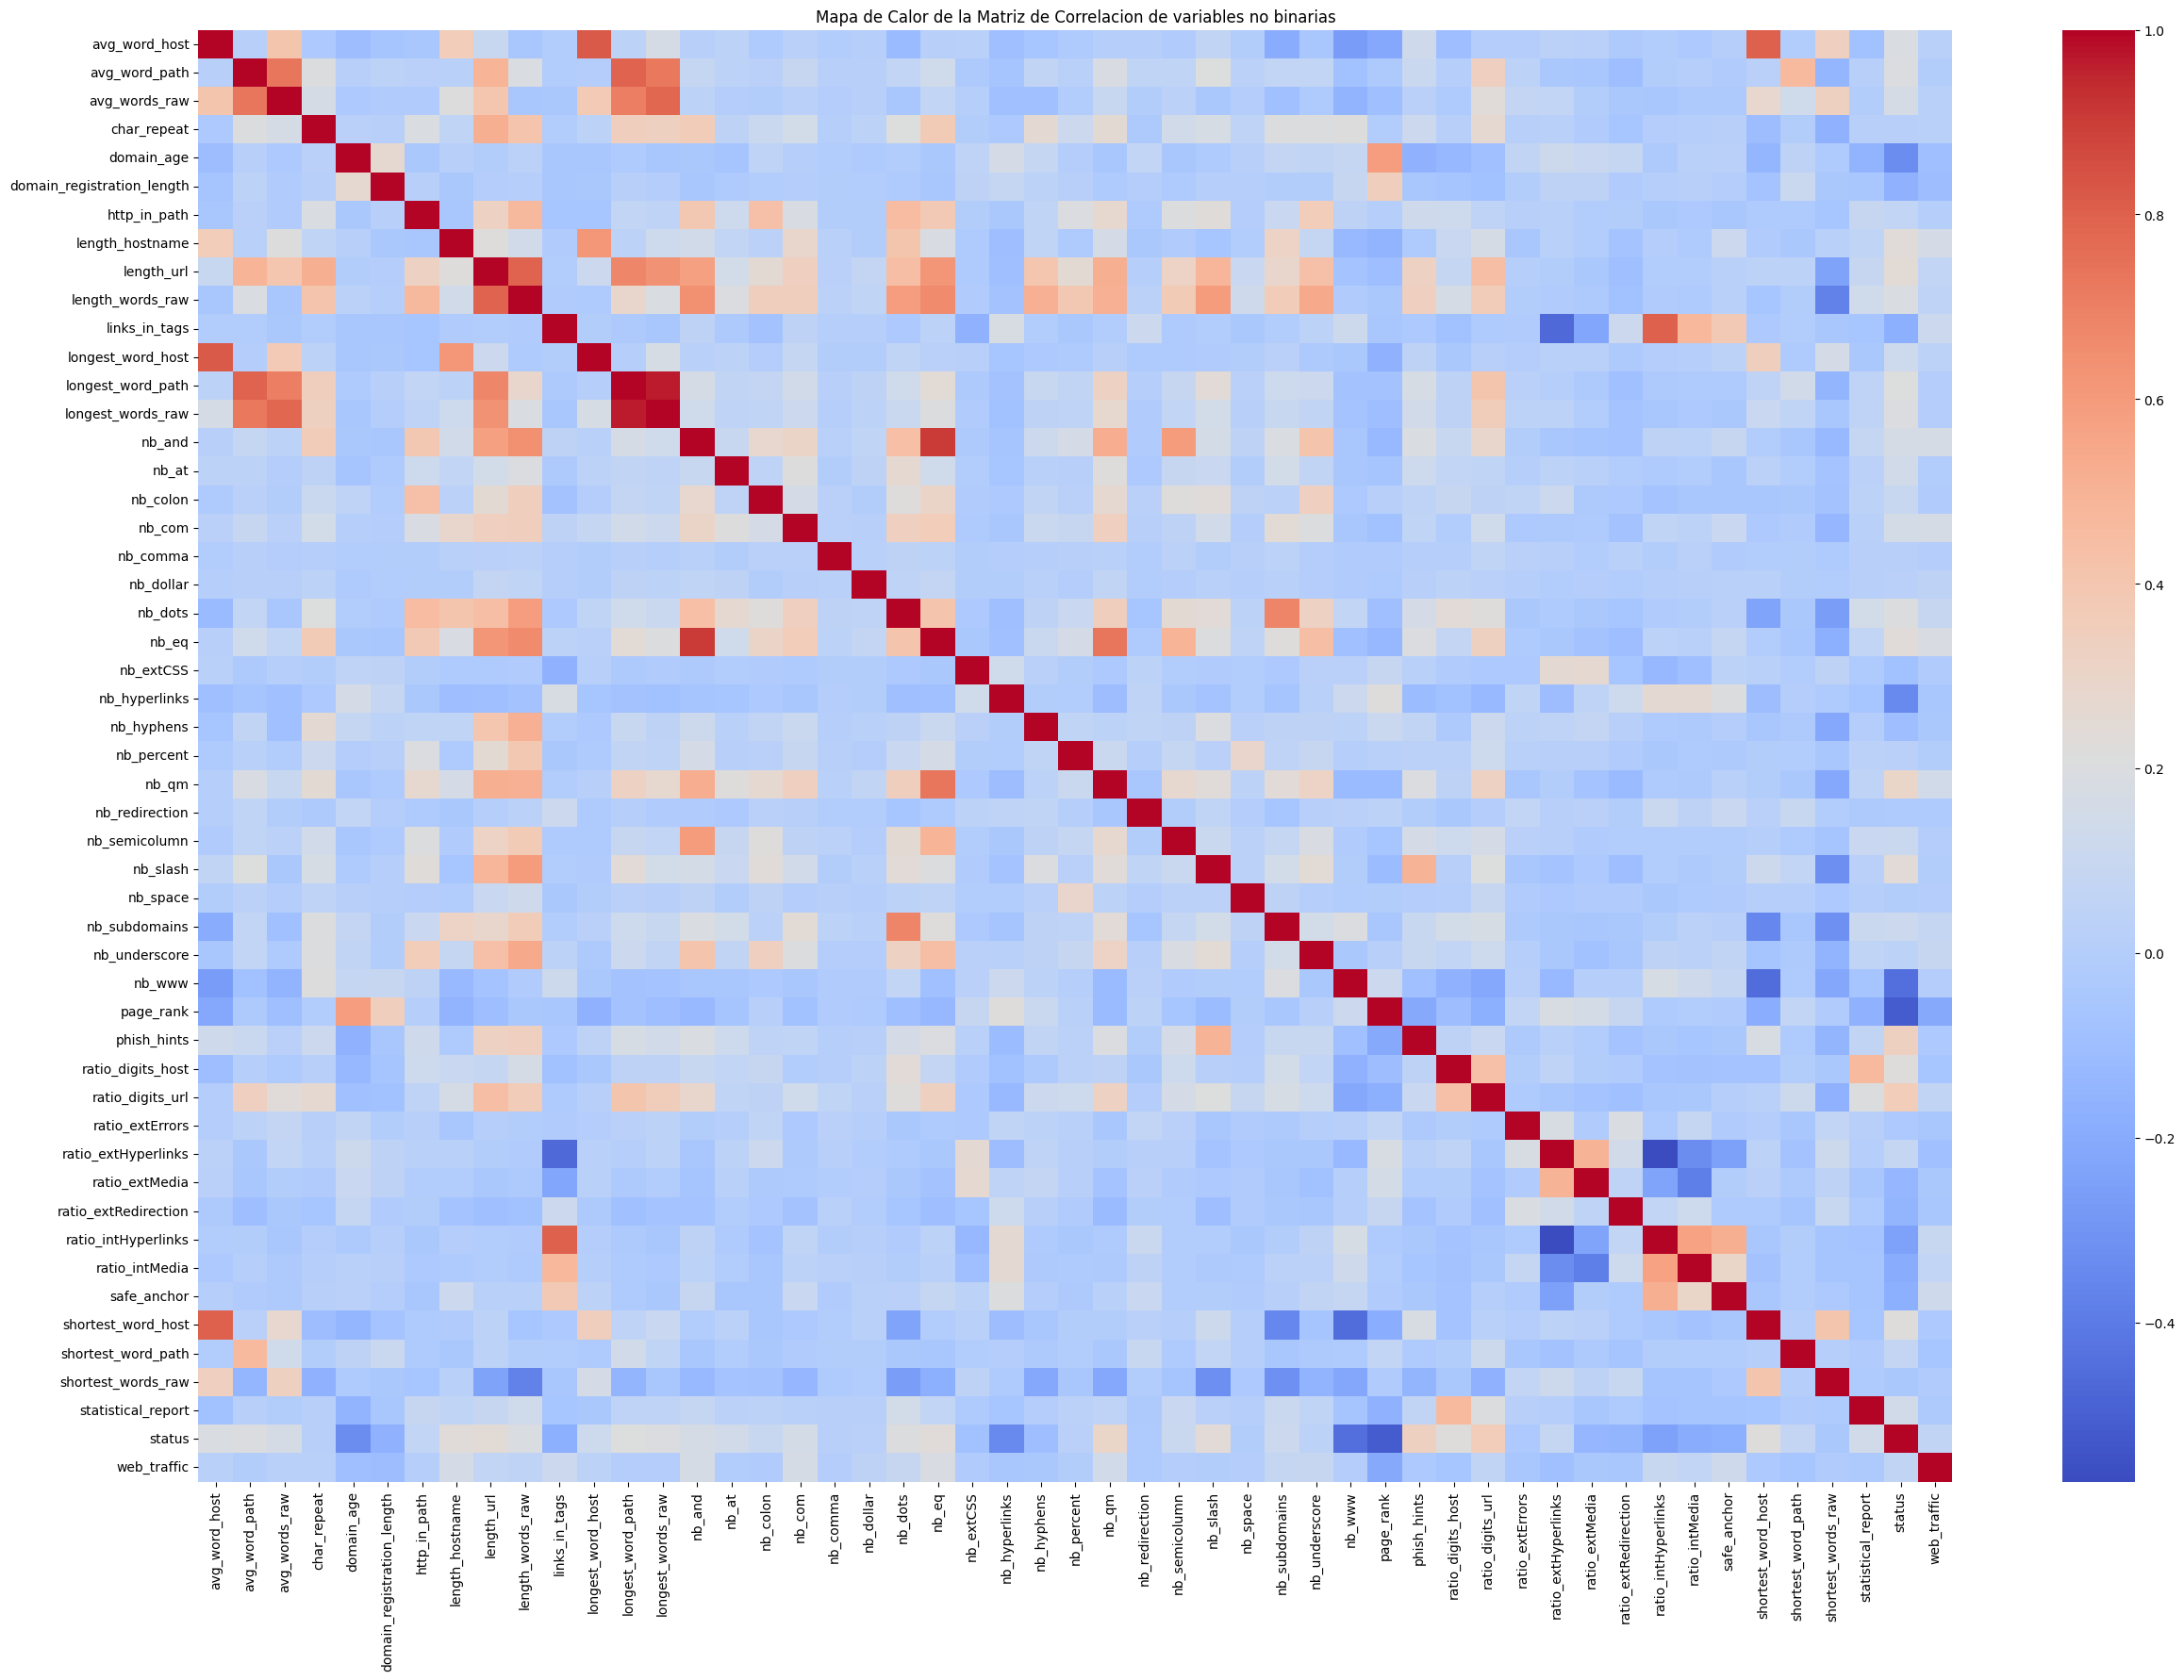

In [19]:
plt.figure(figsize=(30, 20))
non_binary_columns = non_binary_columns.union(['status'])

# Calculo de matriz de correlacion de variables no binarias
correlation_matrix = data[non_binary_columns].corr()

# Mapa de calor 
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Mapa de Calor de la Matriz de Correlacion de variables no binarias')

Text(0.5, 1.0, 'Mapa de Calor de la Matriz de Correlacion de variables binarias')

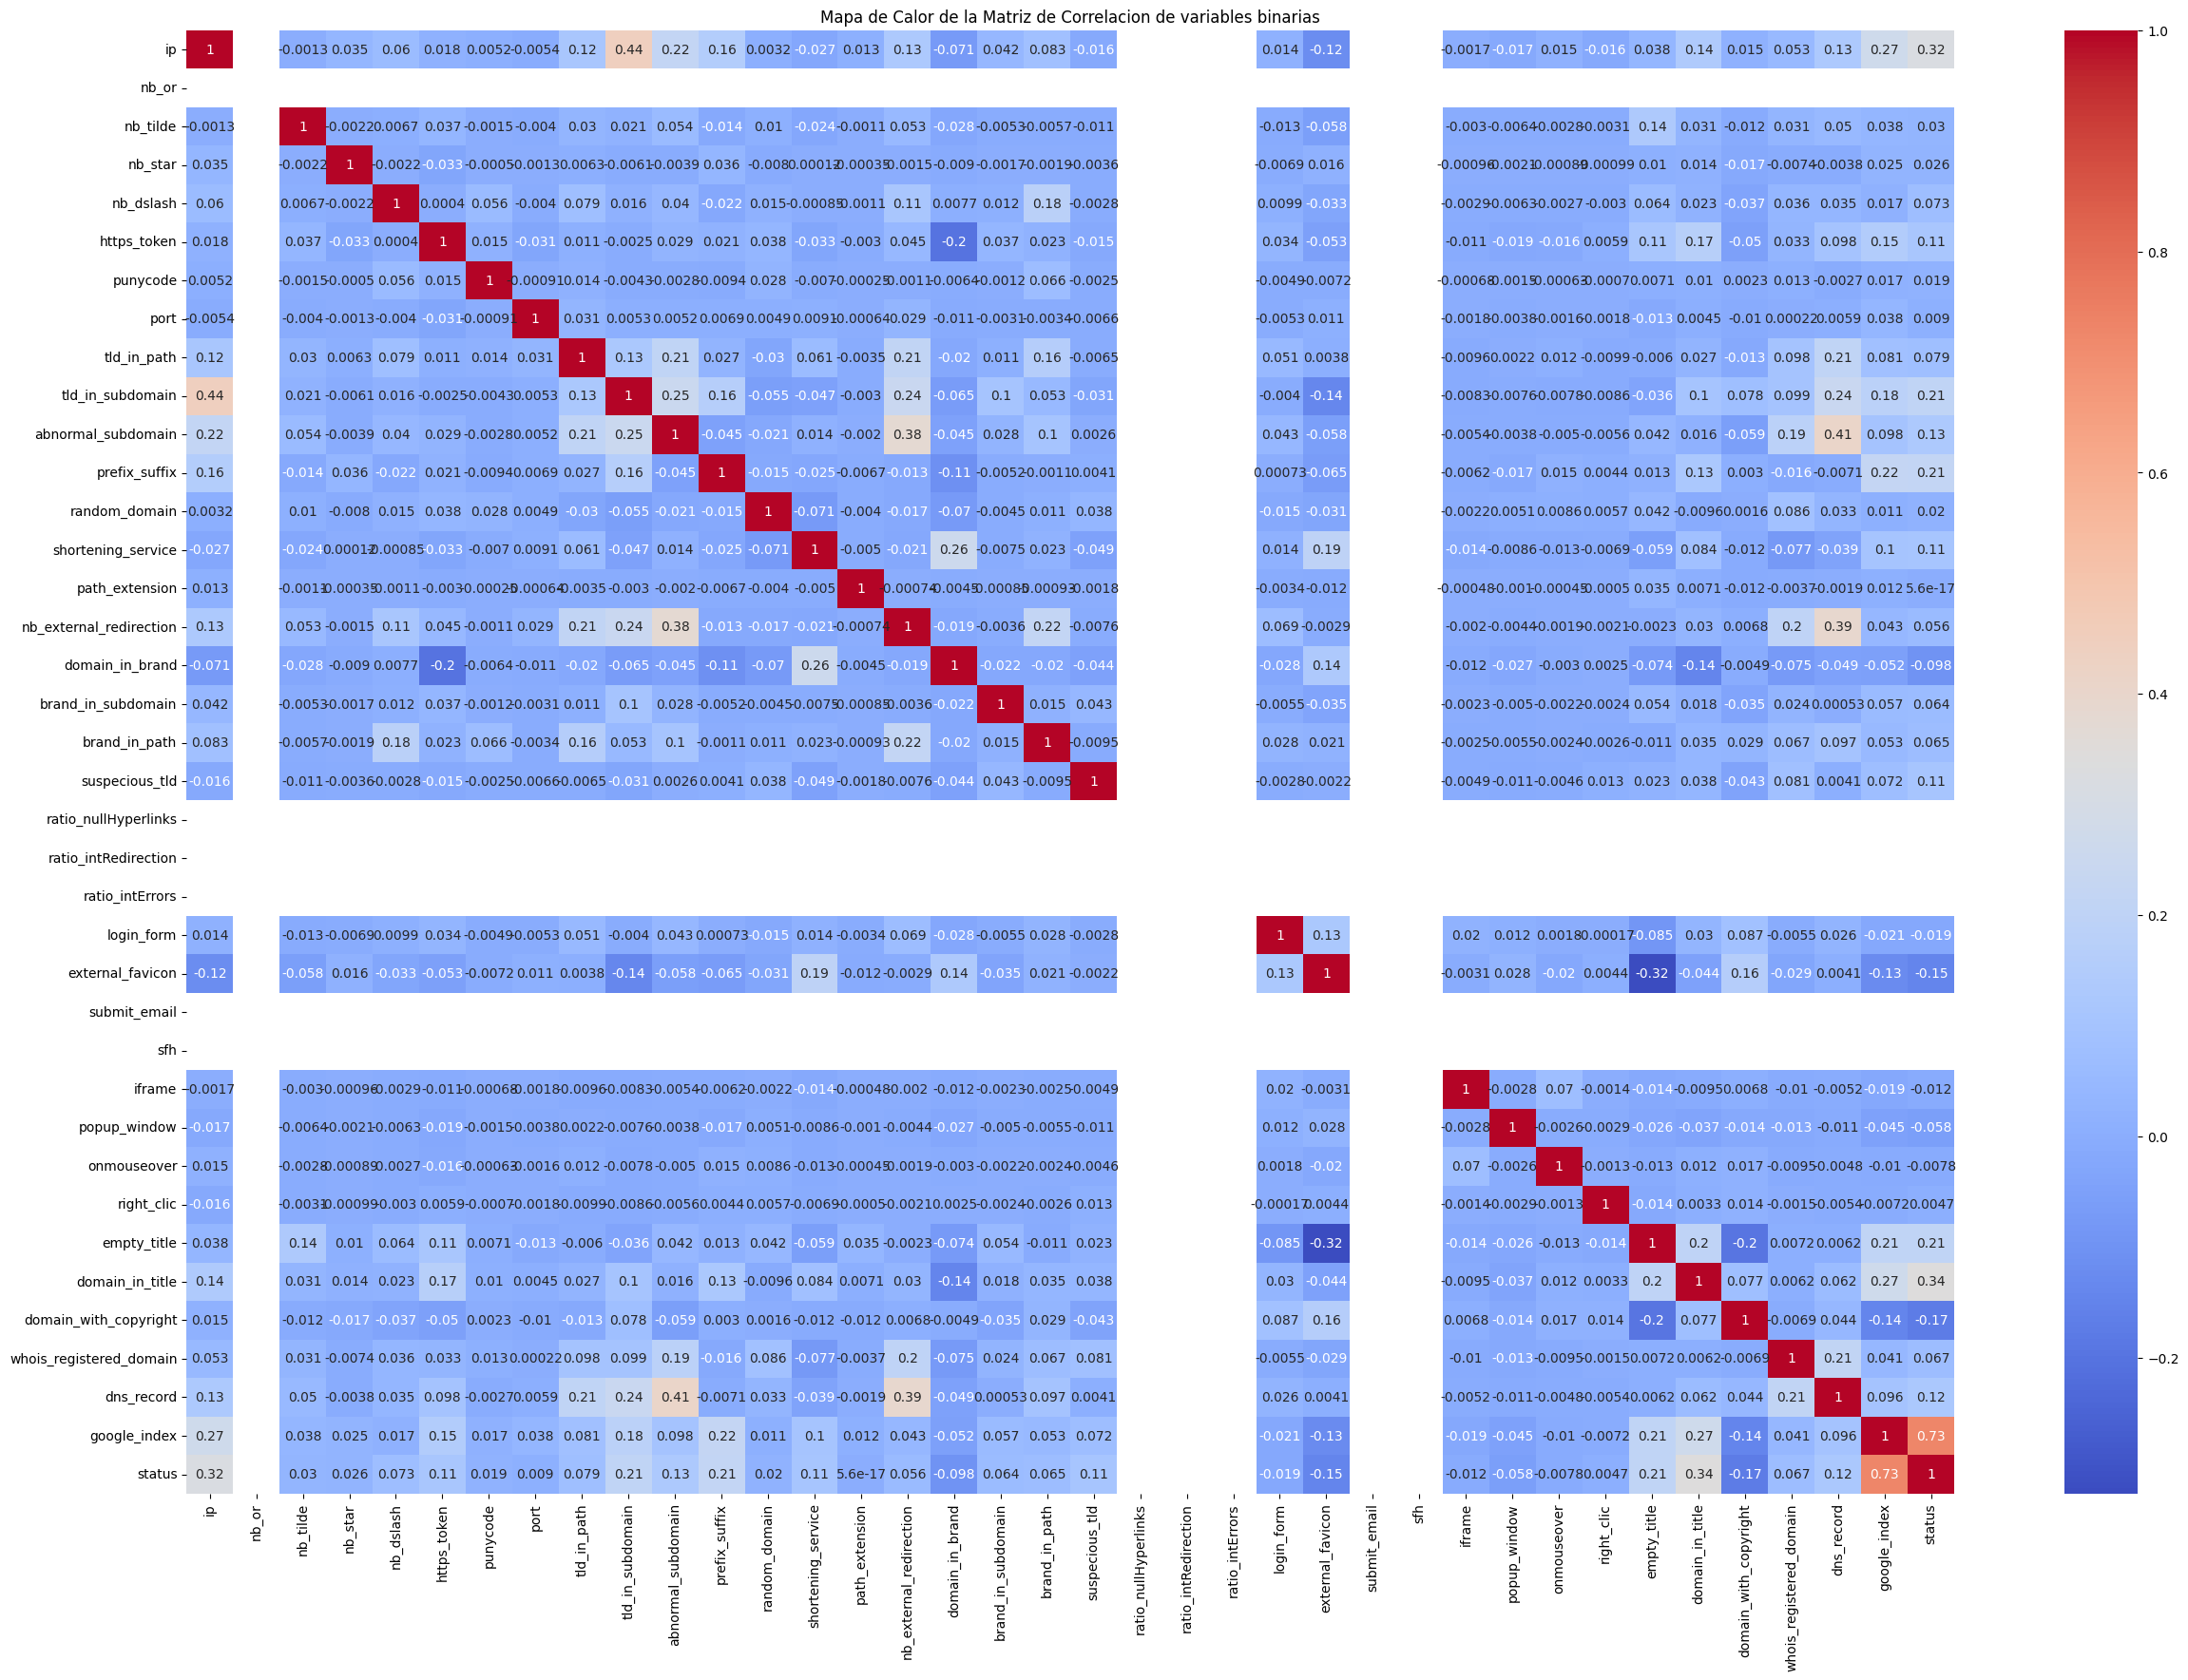

In [27]:
plt.figure(figsize=(30, 20))

# Calculo de matriz de correlacion de variables binarias
bin_correlation_matrix = data[binary_columns].corr()

# Mapa de calor 
sns.heatmap(bin_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de la Matriz de Correlacion de variables binarias')

Nota: Para evitar que el heatmap no se entienda se elimino la anotacion de valores

**Seleccion de carcacteristicas con mayor correlacion con la variable objetivo**

In [21]:
# Correlaciones mas altas con variables no binarias
correlations_with_status = correlation_matrix['status'].drop(labels=['status'])
top_correlation = correlations_with_status.abs().sort_values(ascending=False)
top_10_correlated = top_correlation.head(10)
top_10_correlated

page_rank              0.511137
nb_www                 0.443468
ratio_digits_url       0.356395
nb_hyperlinks          0.342628
phish_hints            0.335393
domain_age             0.331889
nb_qm                  0.294319
length_url             0.248580
ratio_intHyperlinks    0.243982
nb_slash               0.242270
Name: status, dtype: float64

In [22]:
# Correlaciones mas altas con variables binarias
bin_correlations_with_status = bin_correlation_matrix['status'].drop(labels=['status'])
bin_top_correlation = bin_correlations_with_status.abs().sort_values(ascending=False)
bin_top_10_correlated = bin_top_correlation.head(10)
bin_top_10_correlated

google_index             0.731171
domain_in_title          0.342807
ip                       0.321698
prefix_suffix            0.214681
tld_in_subdomain         0.208884
empty_title              0.207043
domain_with_copyright    0.173098
external_favicon         0.146565
abnormal_subdomain       0.128160
dns_record               0.122119
Name: status, dtype: float64

In [23]:
# top 5 variables con correlaciones mas altas
combined_top_correlated = pd.concat([bin_top_10_correlated, top_10_correlated])
combined_top_correlated_sorted = combined_top_correlated.sort_values(ascending=False)
top_correlated = combined_top_correlated_sorted.head(5)
top_correlated

google_index        0.731171
page_rank           0.511137
nb_www              0.443468
ratio_digits_url    0.356395
domain_in_title     0.342807
Name: status, dtype: float64

**Variables seleccionadas**

Se han seleccionado las 5 variables con mayor correlacion respecto al status. 
Estas son:
- google_index
- page_rank
- nb_www
- ratio_digital_url
- domain_in_title


### Split del dataset

In [24]:
from sklearn.model_selection import train_test_split

X = data[top_correlated.index]  # caracteristicas seleccionadas
y = data['status']  # Target

# Split en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Metrica de desempeño principal
La metrica de desempeño principal seleccinoada es el "F1 Score".

**Justificacion**
La puntuacion F1 proporciona un balance entre la presicion y el Recall. Es decir la exactitud de las predicciones positivas y la proporcion de positivos reales identificados de forma correcta. Esto es de suma importancia cuando se trata de detectar phishing, ya que de esta forma se puede minimizar los falsos positivos y los falsos negativos. 
En el contexto del problema, tanto el bloquear sitios legitimos, como permitir los sitios phishing, tiene consecuencias negativas en el usuario final. Con esto en cuenta la puntuacion F1 equilibra ambas preocupaciones, permitiendo evalual la capacidad del modelo para clasificar correctamente los sitios web.

**Referencias**
- Blog, D. C. (2024). Understanding F1 score, accuracy, ROC-AUC, and PR-AUC metrics for models. Deepchecks. https://deepchecks.com/f1-score-accuracy-roc-auc-and-pr-auc-metrics-for-models/ 
- Czakon, J. (2023, 5 septiembre). F1 Score vs ROC AUC vs Accuracy vs PR AUC: Which evaluation metric should you choose? neptune.ai. https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc

# Task 2.1 - Regresión Logística

Respuesta

# Task 2.2 - K-Nearest Neighbors

Respuesta

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
# Crear el modelo de Regresión Logística
logreg_model = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
logreg_model.fit(X_train, y_train)


LogisticRegression()

In [29]:
# Hacer predicciones en el conjunto de prueba
logreg_predictions = logreg_model.predict(X_test)

# Evaluar la precisión del modelo
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print(f'Precisión del modelo de Regresión Logística: {logreg_accuracy}')


Precisión del modelo de Regresión Logística: 0.9063867016622922


In [41]:
# Para la regresion Logistica
from sklearn.metrics import f1_score

# Calcular el puntaje F1 para el modelo de Regresión Logística
logreg_f1 = f1_score(y_test, logreg_predictions, average='weighted')
print(f'Puntaje F1 del modelo de Regresión Logística: {logreg_f1:.15f}')


Puntaje F1 del modelo de Regresión Logística: 1.0


In [ ]:
# Para KNN
